# 1. Select a dataset and define the practical problem you are studying with the ML project – this may include a definition of a couple of research questions.  

I selected a dataset from Jamhuriya University of Science & Technology, containing student academic records, including grades, attendance, and demographics. The goal of this project is to predict students' academic performance using Machine Learning. By analyzing historical data, I aim to identify factors influencing performance and help educators provide early interventions for at-risk students.

Research Questions
1. What are the key factors influencing student performance?
2. Can Machine Learning effectively predict student academic performance?
3. Can predictive analytics help improve educational strategies?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle

C:\Users\KCT\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
df = pd.read_csv('dataset_ml.csv')

In [3]:
# Display the first 5 rows of the dataset
df.head()

,Gender,Age,AcademicYear,Mode,Shift,Faculty,SecondaryGrade,FirstSemesterGrade,Grade,PresentPeriods,AbsentPeriods
0,Male,21,2023,Fulltime,Morning,Economics and Business Management,B,A+,A+,309,0
1,Male,19,2023,Fulltime,Morning,Economics and Business Management,C-,B,B,308,16
2,Female,20,2023,Fulltime,Morning,Economics and Business Management,C-,C+,C+,307,0
3,Male,22,2023,Fulltime,Morning,Economics and Business Management,C-,B-,C+,306,16
4,Female,20,2023,Fulltime,Morning,Economics and Business Management,C+,A,A-,304,0


In [4]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              4018 non-null   object
 1   Age                 4018 non-null   int64 
 2   AcademicYear        4018 non-null   int64 
 3   Mode                4018 non-null   object
 4   Shift               4018 non-null   object
 5   Faculty             4018 non-null   object
 6   SecondaryGrade      4018 non-null   object
 7   FirstSemesterGrade  4018 non-null   object
 8   Grade               4018 non-null   object
 9   PresentPeriods      4018 non-null   int64 
 10  AbsentPeriods       4018 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 345.4+ KB
None


The dataset I am working with contains 4018 student records and 11 features, which include both categorical and numerical data.

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender                0
Age                   0
AcademicYear          0
Mode                  0
Shift                 0
Faculty               0
SecondaryGrade        0
FirstSemesterGrade    0
Grade                 0
PresentPeriods        0
AbsentPeriods         0
dtype: int64



I checked the dataset for missing values across all columns and confirmed that there are no missing values in any of the fields

In [6]:
# Define numerical features explicitly
numerical_features = df.select_dtypes(include=['number']).columns

# Displaying summary statistics
numerical_summary = df[numerical_features].describe().T
print("Descriptive Statistics for Numerical Features:")
print(numerical_summary)

Descriptive Statistics for Numerical Features:
                 count         mean        std     min     25%     50%  \
Age             4018.0    21.692633   2.498962    17.0    20.0    21.0   
AcademicYear    4018.0  2021.861872   0.988147  2020.0  2021.0  2022.0   
PresentPeriods  4018.0   156.245645  70.211113     0.0   130.0   168.0   
AbsentPeriods   4018.0    36.893728  36.452545     0.0    10.0    28.0   

                   75%     max  
Age               23.0    39.0  
AcademicYear    2023.0  2024.0  
PresentPeriods   205.0   309.0  
AbsentPeriods     53.0   200.0  


I analyzed the descriptive statistics for the numerical features in the dataset, including Age, AcademicYear, PresentPeriods, and AbsentPeriods. The students' ages range from 17 to 39, with a mean of 21.69, indicating a mix of traditional and non-traditional students. The academic years span from 2020 to 2024, suggesting a dataset covering recent years with likely consistent educational conditions. The average number of present periods is 156, but the high standard deviation of 70 indicates significant variability in attendance. Similarly, absent periods range widely, with an average of 36 and a maximum of 200, showing that some students face attendance challenges.

In [7]:
# Display basic statistics for categorical columns
print("\nCategorical Summary:")
print(df.describe(include=['object']))


Categorical Summary:
       Gender      Mode      Shift          Faculty SecondaryGrade  \
count    4018      4018       4018             4018           4018   
unique      2         2          2                4              9   
top      Male  Fulltime  Afternoon  Computer and IT              B   
freq     2594      3309       2319             2489            933   

       FirstSemesterGrade Grade  
count                4018  4018  
unique                  9     9  
top                     A     A  
freq                  625   604  


I analyzed the categorical features in the dataset, which includes 4018 students. Male is the most common gender, Fulltime is the dominant study mode, and Afternoon is the more frequent shift. Computer and IT is the most popular faculty, while A is the most common grade across secondary, first-semester, and final grades. These insights help in understanding student distribution and academic trends for further analysis.









# 2. Perform diverse and meaningful data explorations including numerical and visual analysis that serve as preparation tasks for predictive modeling.

####  2.1 How is **Age** distributed across students, and are there any patterns across faculties or shifts?  

C:\Users\KCT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


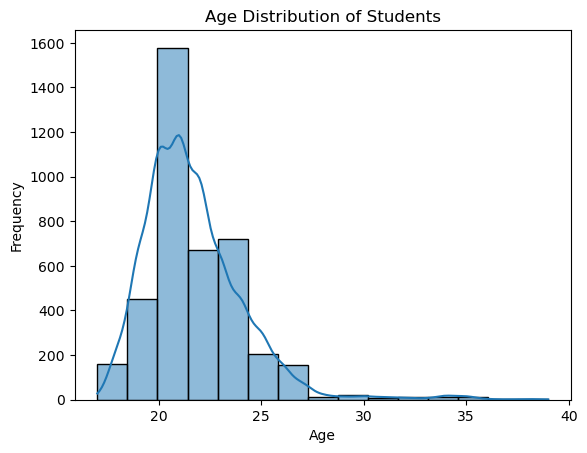

In [8]:
# Age distribution histogram
sns.histplot(data=df, x='Age', kde=True, bins=15)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram shows that most students are between 18 and 25 years old, with a peak around 20 years. The distribution is slightly right-skewed, indicating fewer older students but some extending beyond 30 years. 

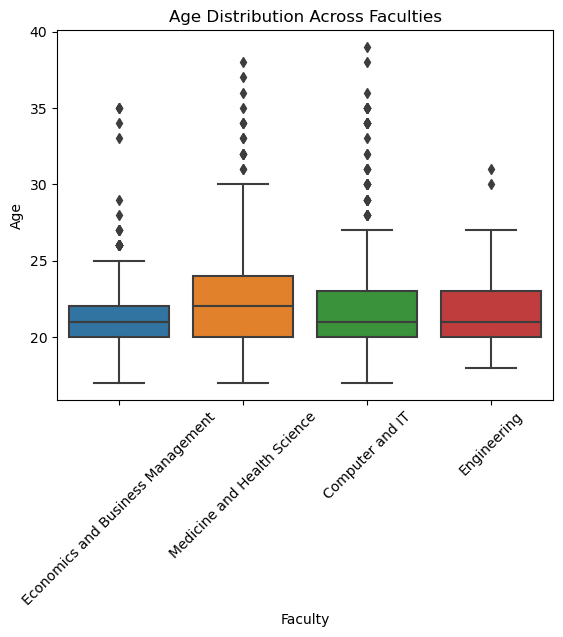

In [9]:
# Age distribution across faculties
sns.boxplot(data=df, x='Faculty', y='Age')
plt.title('Age Distribution Across Faculties')
plt.xticks(rotation=45)
plt.show()

The boxplot shows age distribution across faculties, revealing some variations. Medicine and Health Science has a wider age range, with several older students, while Economics and Business Management, Computer and IT, and Engineering have a more concentrated age range around early 20s. Outliers in all faculties indicate a few significantly older students, suggesting late enrollments or career shifts in certain fields.









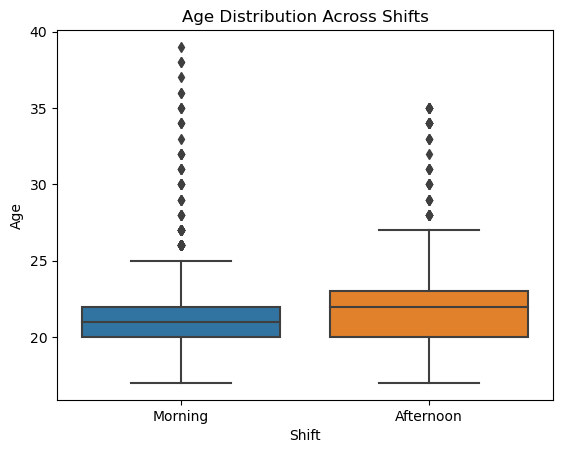

In [10]:
# Age distribution across shifts
sns.boxplot(data=df, x='Shift', y='Age')
plt.title('Age Distribution Across Shifts')
plt.show()

The boxplot shows the age distribution across shifts, indicating that students in the afternoon shift tend to be slightly older than those in the morning shift. Both shifts have similar median ages, but the afternoon shift has more outliers, suggesting a higher number of older students. This could indicate that older students prefer afternoon classes, possibly due to work or other commitments.









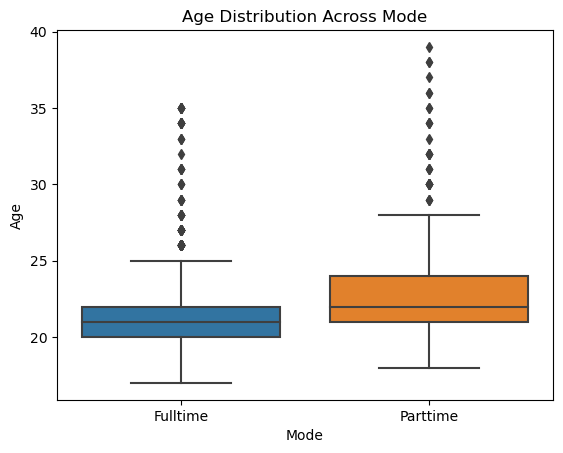

In [11]:
# Age distribution across Mode
sns.boxplot(data=df, x='Mode', y='Age')
plt.title('Age Distribution Across Mode')
plt.show()

The boxplot shows the age distribution across study modes, revealing that part-time students tend to be older than full-time students. The median age for part-time students is higher, and they have more outliers, indicating a wider age range. This suggests that part-time students may include working professionals or individuals returning to education later in life.









#### 2.2 How do **PresentPeriods** and **AbsentPeriods** vary across different **faculties** and **shifts**?  

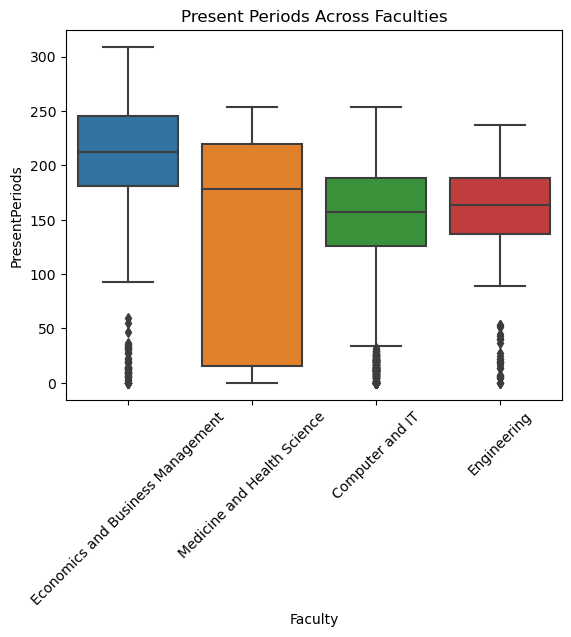

In [12]:
# PresentPeriods across faculties
sns.boxplot(data=df, x='Faculty', y='PresentPeriods')
plt.title('Present Periods Across Faculties')
plt.xticks(rotation=45)
plt.show()

The boxplot illustrates the variation in Present Periods across different faculties, showing that Economics and Business Management and Medicine and Health Science have higher attendance distributions compared to Computer and IT and Engineering. The wide spread in Medicine and Health Science suggests significant differences in attendance among students. Additionally, outliers in all faculties indicate students with exceptionally low attendance.









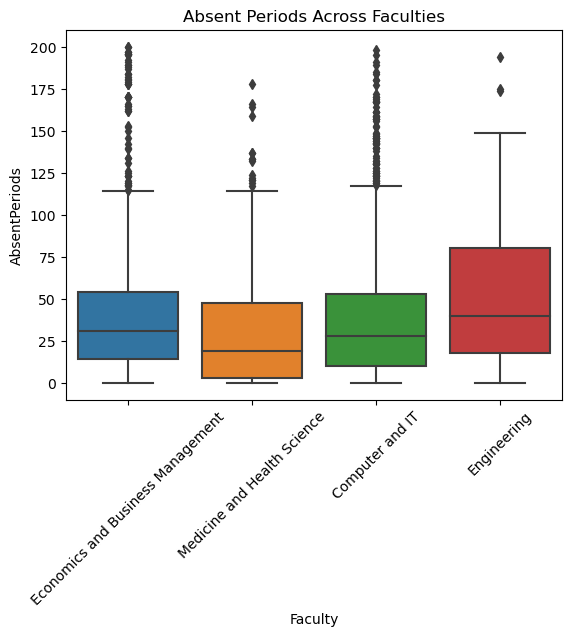

In [13]:
# AbsentPeriods across faculties
sns.boxplot(data=df, x='Faculty', y='AbsentPeriods')
plt.title('Absent Periods Across Faculties')
plt.xticks(rotation=45)
plt.show()


The boxplot shows Absent Periods across different faculties, revealing that Engineering students have the highest absence rates, with a wider spread and more extreme outliers. Computer and IT also show a considerable variation in absences, while Medicine and Health Science and Economics and Business Management have relatively lower absenteeism.

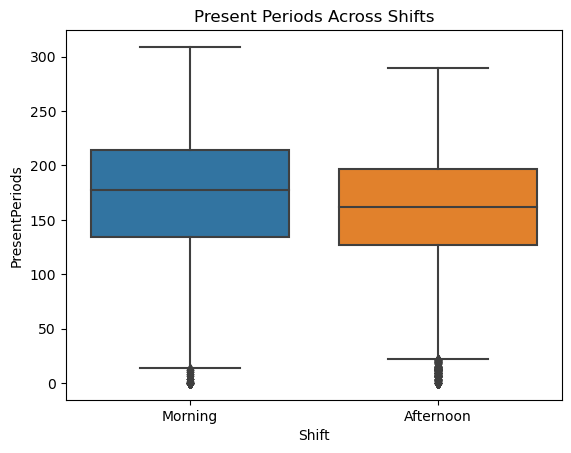

In [14]:
# Attendance by shifts
sns.boxplot(data=df, x='Shift', y='PresentPeriods')
plt.title('Present Periods Across Shifts')
plt.show()

The boxplot illustrates Present Periods across shifts, showing that morning and afternoon students have similar attendance distributions. Both shifts have a comparable median, interquartile range, and outliers, indicating no significant difference in attendance patterns between morning and afternoon sessions.









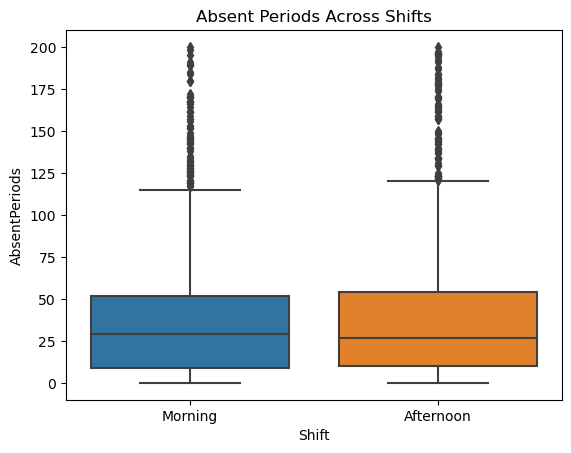

In [15]:
sns.boxplot(data=df, x='Shift', y='AbsentPeriods')
plt.title('Absent Periods Across Shifts')
plt.show()

The boxplot shows Absent Periods across shifts, indicating that morning and afternoon students have similar absence patterns. Both shifts exhibit a comparable median, interquartile range, and distribution of outliers, suggesting no significant difference in absenteeism between the two groups.









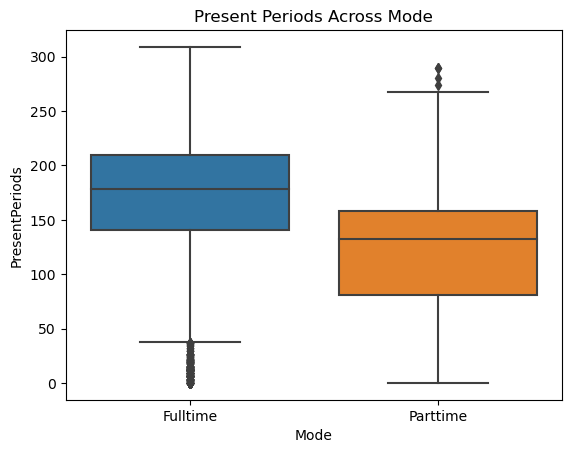

In [16]:
# Attendance by Mode
sns.boxplot(data=df, x='Mode', y='PresentPeriods')
plt.title('Present Periods Across Mode')
plt.show()

The boxplot displays Present Periods across study modes, revealing that full-time students have a higher median and interquartile range of attendance compared to part-time students. Full-time students also show a more consistent distribution, whereas part-time students exhibit a wider spread with more variability in attendance.









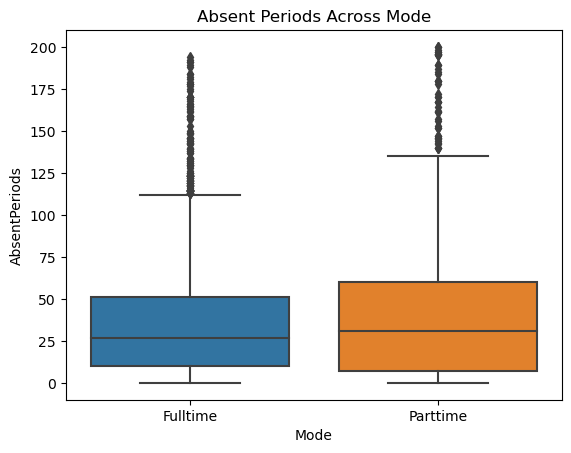

In [17]:
sns.boxplot(data=df, x='Mode', y='AbsentPeriods')
plt.title('Absent Periods Across Mode')
plt.show()

The boxplot shows Absent Periods across study modes, indicating that part-time students tend to have slightly higher median absences compared to full-time students. Both groups exhibit a similar distribution, but part-time students show more extreme outliers, suggesting greater variability in attendance patterns.









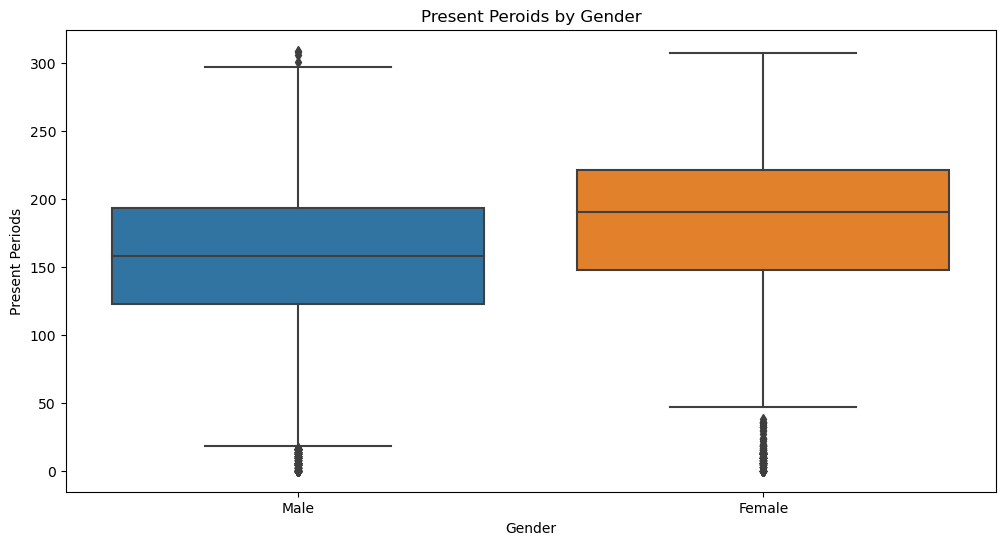

In [18]:
# Attendance Trends by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='PresentPeriods')
plt.title('Present Peroids by Gender')
plt.xlabel('Gender')
plt.ylabel('Present Periods')
plt.show()

The boxplot illustrates Present Periods by Gender, showing that females generally have a higher median attendance compared to males. The distribution of attendance is wider for females, with more variability and a higher upper range, suggesting that females tend to be more consistently present than males. Both genders exhibit some outliers at lower attendance levels.









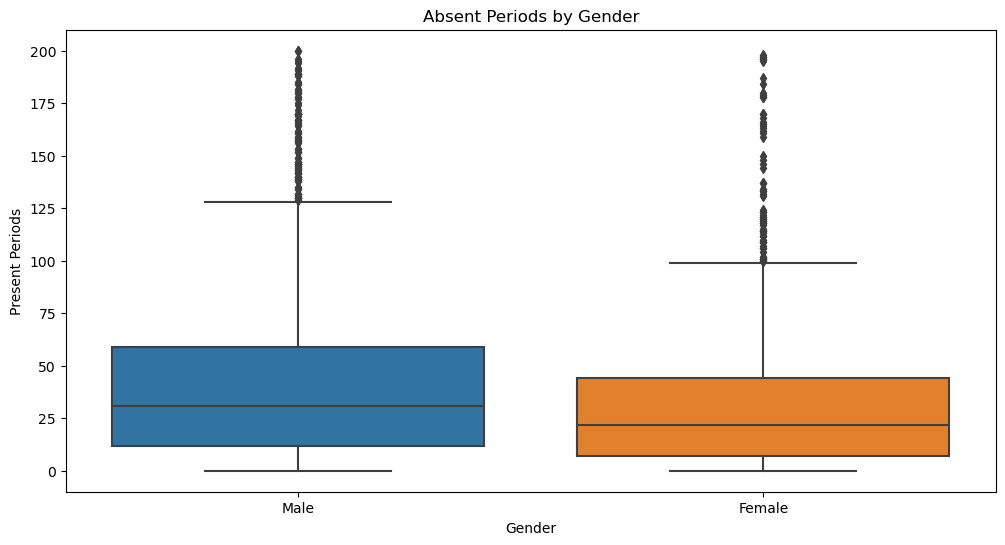

In [19]:
# Attendance Trends by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='AbsentPeriods')
plt.title('Absent Periods by Gender')
plt.xlabel('Gender')
plt.ylabel('Present Periods')
plt.show()

The boxplot for Absent Periods by Gender shows that males and females have similar median absenteeism levels, but males exhibit slightly higher variability. Both genders have numerous outliers, indicating students with significantly high absenteeism. However, the spread of absentee periods is somewhat balanced, with no major differences between male and female students.









#### 2.3 How are grades distributed (A+, A, A-, B+, B, etc.) across the dataset? Are certain grade ranges more common? 

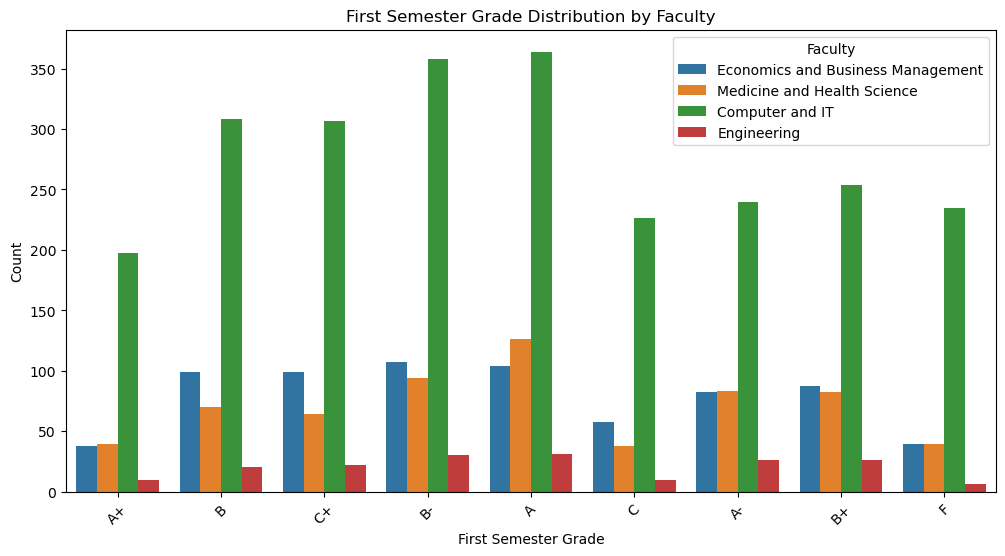

In [20]:
# First Semester Grade Distribution by Faculty
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FirstSemesterGrade', hue='Faculty')
plt.title('First Semester Grade Distribution by Faculty')
plt.xlabel('First Semester Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The First Semester Grade Distribution by Faculty chart shows that the Computer and IT faculty has the highest number of students across all grade categories, while the Engineering faculty has the lowest representation. The most common grades appear to be A and B, particularly in Computer and IT. Other faculties, such as Medicine and Health Science, have a more balanced grade distribution. This suggests that certain faculties perform better overall or have a larger student population in the dataset.









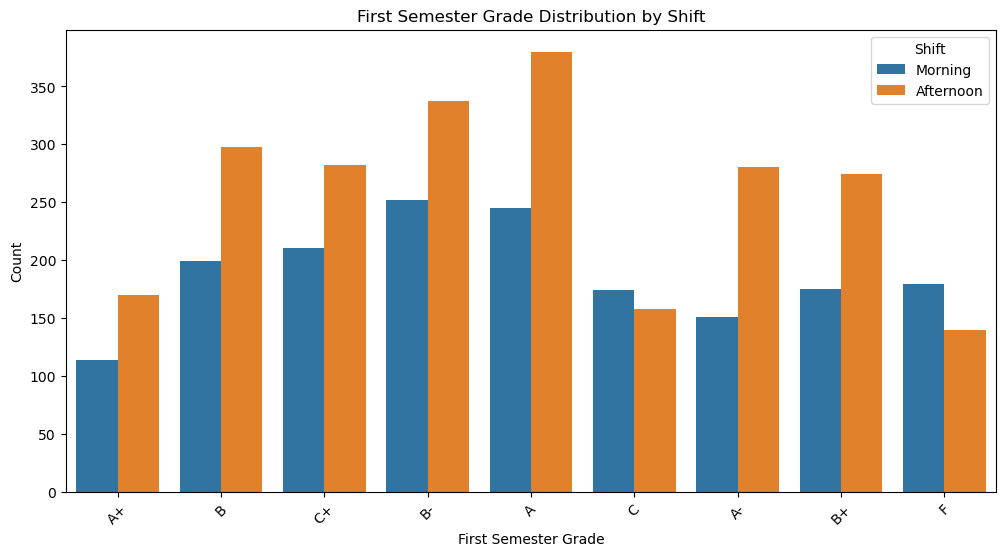

In [21]:
# First Semester Grade Distribution by Shift
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FirstSemesterGrade', hue='Shift')
plt.title('First Semester Grade Distribution by Shift')
plt.xlabel('First Semester Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The First Semester Grade Distribution by Shift chart shows that students in the Afternoon shift generally achieve higher grades than those in the Morning shift. The A and B grades are more frequent among Afternoon students, whereas the Morning shift has a relatively balanced distribution across all grades. This pattern may indicate differences in learning environments, student engagement, or other influencing factors between the shifts.




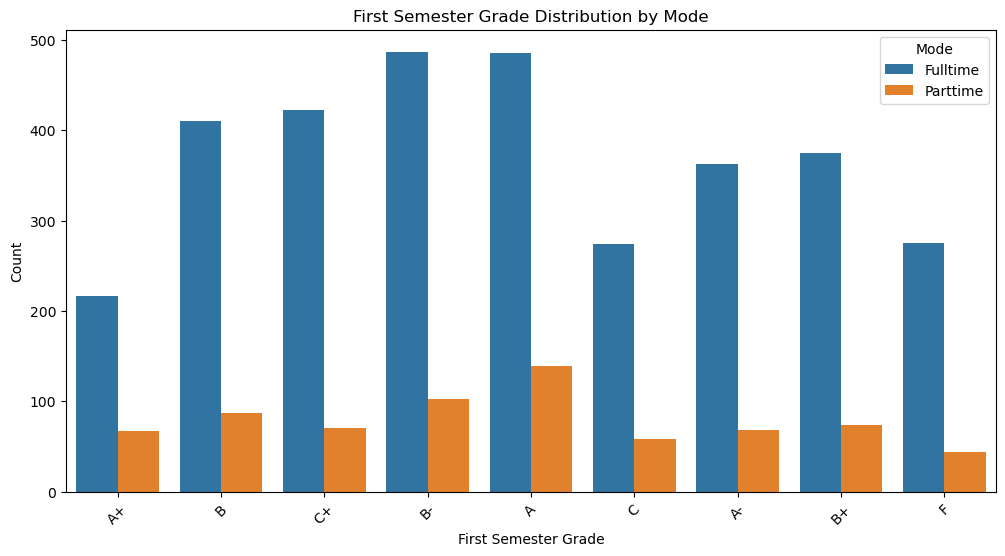

In [22]:
# First Semester Grade Distribution by Mode
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FirstSemesterGrade', hue='Mode')
plt.title('First Semester Grade Distribution by Mode')
plt.xlabel('First Semester Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The First Semester Grade Distribution by Mode chart shows that full-time students perform significantly better than part-time students, as they have higher counts across all grade categories. Grades A and B are more common among full-time students, whereas part-time students have a relatively lower distribution of top grades. This trend may indicate that full-time students have more time for coursework and study, leading to better academic performance.









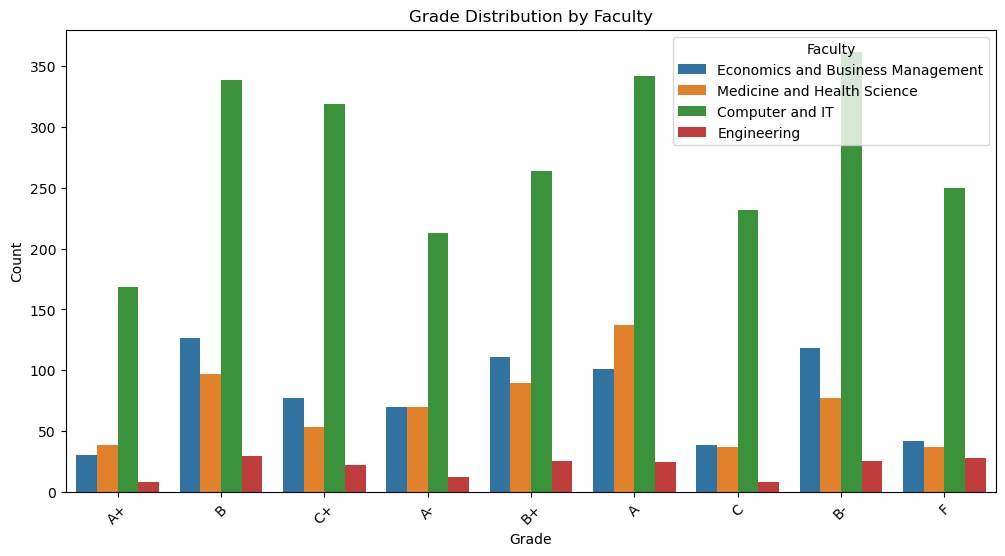

In [23]:
# Grade Distribution by Faculty
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Grade', hue='Faculty')
plt.title('Grade Distribution by Faculty')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The Grade Distribution by Faculty chart indicates that Computer and IT students dominate in all grade categories, particularly in grades A and B, suggesting strong academic performance. Economics and Business Management and Medicine and Health Science faculties have a more balanced distribution of grades, while Engineering students show lower grade counts overall. 

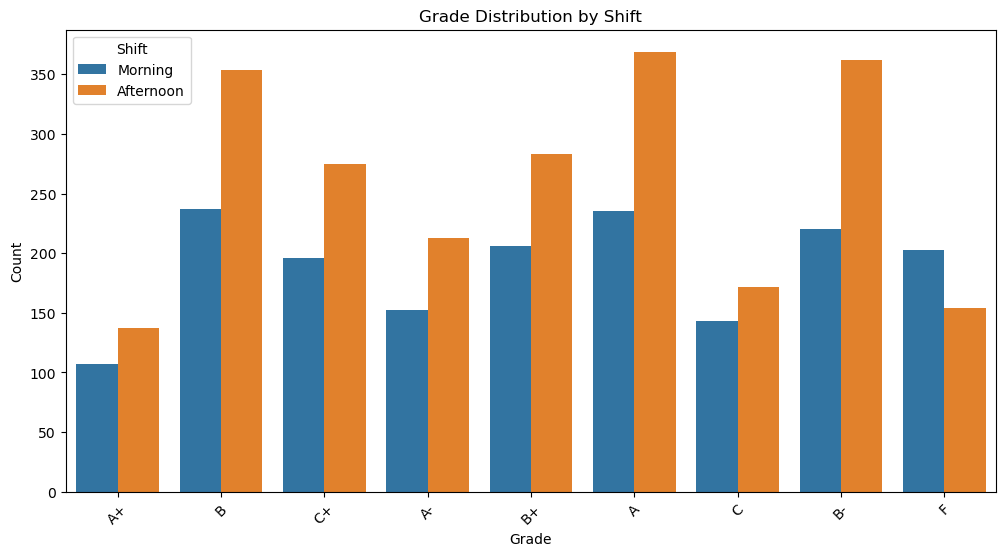

In [24]:
# Grade Distribution by Shift
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Grade', hue='Shift')
plt.title('Grade Distribution by Shift')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The Grade Distribution by Shift chart shows that afternoon students tend to achieve higher grades compared to morning students, particularly in grades A, B, and B+. Morning students have a relatively balanced distribution, but their numbers in higher grades are lower.

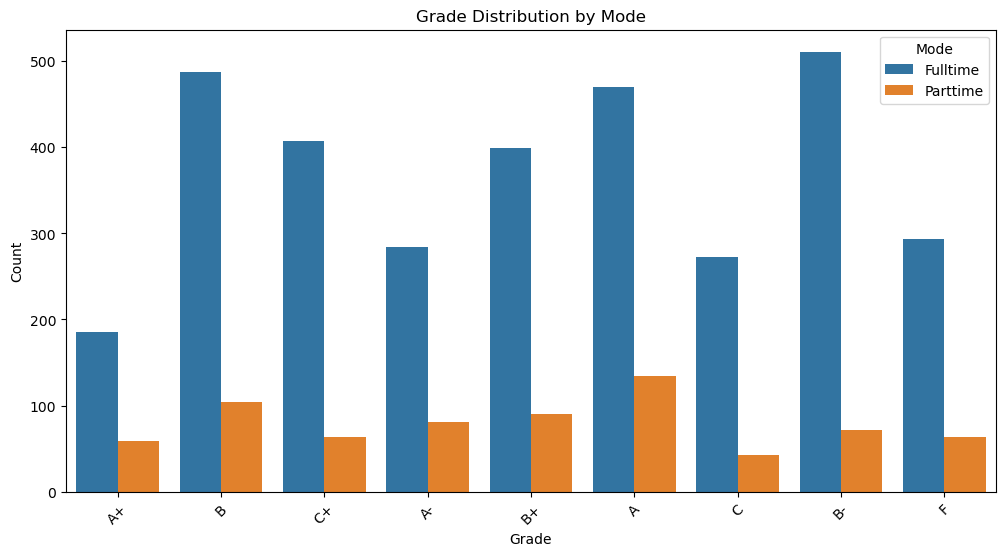

In [25]:
# Grade Distribution by Mode
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Grade', hue='Mode')
plt.title('Grade Distribution by Mode')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The Grade Distribution by Mode chart shows that full-time students significantly outperform part-time students across all grade categories. Full-time students have a higher frequency of A, B, and B+ grades, while part-time students are comparatively fewer in these top grades. This suggests that full-time students may have more time to dedicate to their studies, leading to better academic performance

#### 2.4 How are grades distributed across different **Faculties**? Are certain faculties consistently outperforming or underperforming?  

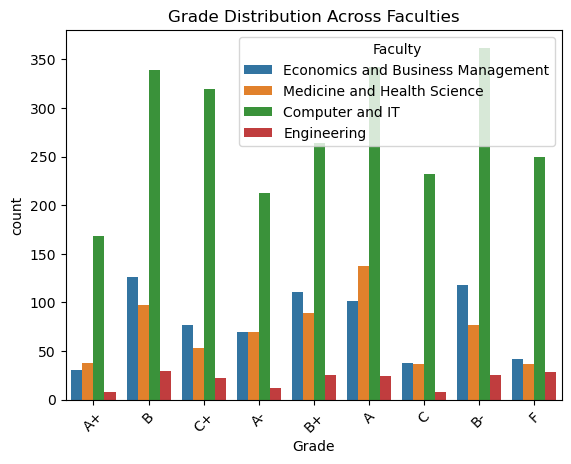

In [26]:
sns.countplot(data=df, x='Grade', hue='Faculty')
plt.title('Grade Distribution Across Faculties')
plt.xticks(rotation=45)
plt.show()


The chart shows the grade distribution across four faculties. The Computer and IT faculty has the highest number of students in most grade categories, particularly in A and B, indicating strong performance. Economics and Business Management and Engineering also show notable grade distributions, with Engineering having more students in lower grades (C and below). Medicine and Health Science has a relatively even distribution, though it shows a slightly lower number of students in higher grades. This suggests varying academic performance across different faculties.








#### 2.5 Do students in the **Morning Shift** perform better than those in the **Afternoon Shift**?  

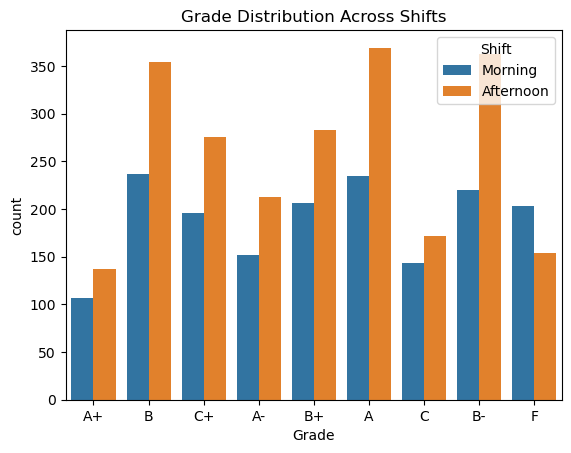

In [27]:
sns.countplot(data=df, x='Grade', hue='Shift')
plt.title('Grade Distribution Across Shifts')
plt.show()

The chart compares the grade distribution between morning and afternoon shifts. It shows that students in the Morning Shift generally perform better than those in the Afternoon Shift, as evidenced by higher counts in higher grade categories like A and B. While the Afternoon Shift has more students in the C and F grades, the overall performance is skewed towards the Morning Shift, suggesting that students in the morning tend to achieve better academic results.








#### 2.6 Are there observable differences in **academic performance by Gender**?  

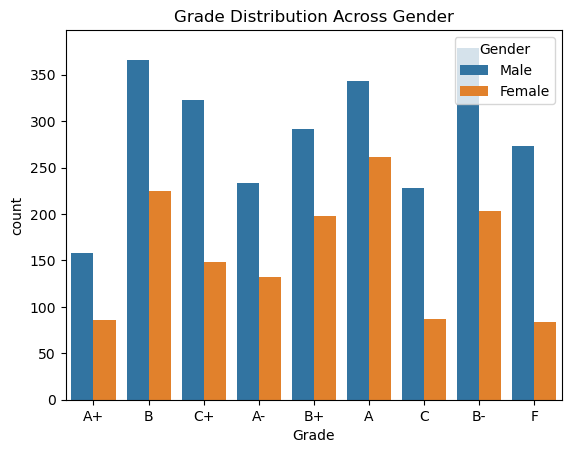

In [28]:
sns.countplot(data=df, x='Grade', hue='Gender')
plt.title('Grade Distribution Across Gender')
plt.show()


The chart shows that Male students generally achieve higher grades than Female students, with more Male students in A and B categories, while Female students are more prevalent in C and B-.








#### 2.7 How does **attendance (PresentPeriods and AbsentPeriods)** vary across different grade categories (e.g., A+, B, C, F)?  

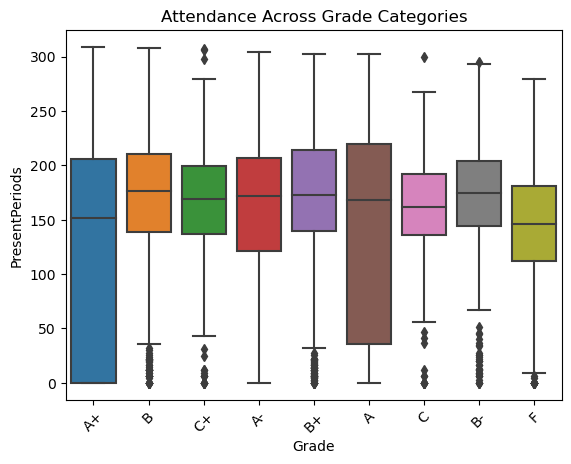

In [29]:
sns.boxplot(data=df, x='Grade', y='PresentPeriods')
plt.title('Attendance Across Grade Categories')
plt.xticks(rotation=45)
plt.show()

The boxplot reveals that students with higher grades (A+, A, B) generally have better attendance, as reflected by higher median attendance in these categories. In contrast, lower grade categories (C, C-, F) show more variation and typically lower attendance rates.








#### 2.8 Are there observable trends in **Final Grades** across different **academic years **?  

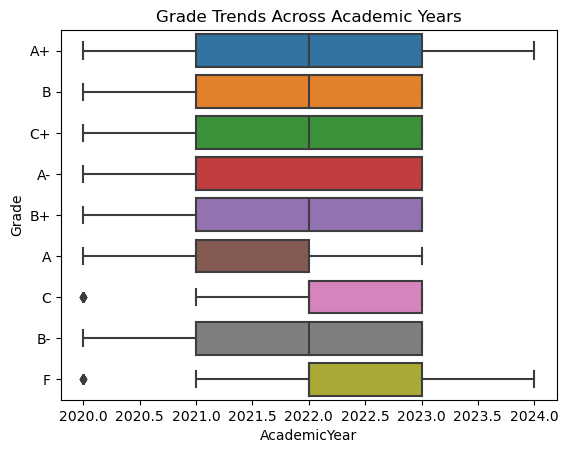

In [30]:
sns.boxplot(data=df, x='AcademicYear', y='Grade')
plt.title('Grade Trends Across Academic Years')
plt.show()

The boxplot shows that higher grades (A+, A, B) tend to be more frequent in the earlier academic years (2020–2022), while the lower grades (C, C-, F) are more prominent in later years (2023–2024), indicating a possible trend of declining performance over time.








#### 2.9  Is there a **minimum attendance threshold** associated with higher academic success rates?  

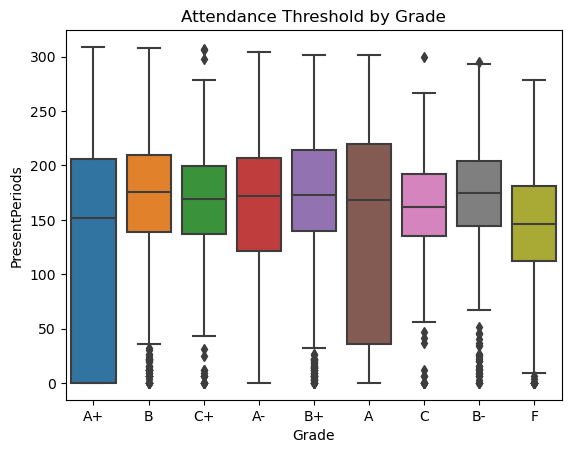

In [31]:
sns.boxplot(data=df, x='Grade', y='PresentPeriods')
plt.title('Attendance Threshold by Grade')
plt.show()

The boxplot shows that higher grades, such as A+ and A, are associated with higher average attendance (over 150 PresentPeriods). In contrast, lower grades like F and B- have lower attendance, indicating that a minimum attendance threshold might be linked to better academic performance.








#### 2.10 Are students with excessive absences consistently underperforming?  

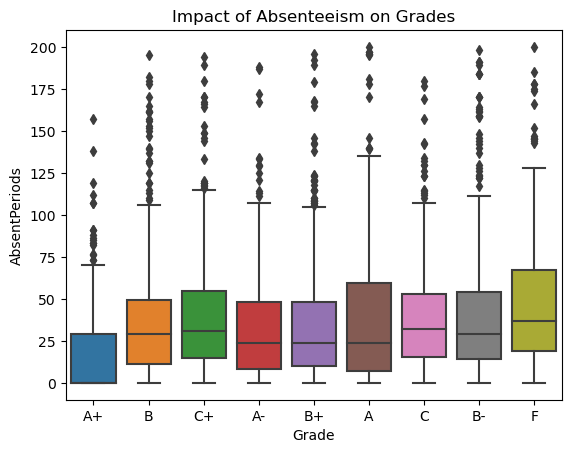

In [32]:
sns.boxplot(data=df, x='Grade', y='AbsentPeriods')
plt.title('Impact of Absenteeism on Grades')
plt.show()

The boxplot suggests that students with excessive absenteeism, especially those with grades like F and C, tend to have higher numbers of absences. This trend shows that absenteeism negatively impacts performance, with students who frequently miss class generally achieving lower grades.








#### 2.11 Are attendance trends different for students in **Morning Shifts vs. Afternoon Shifts**?  

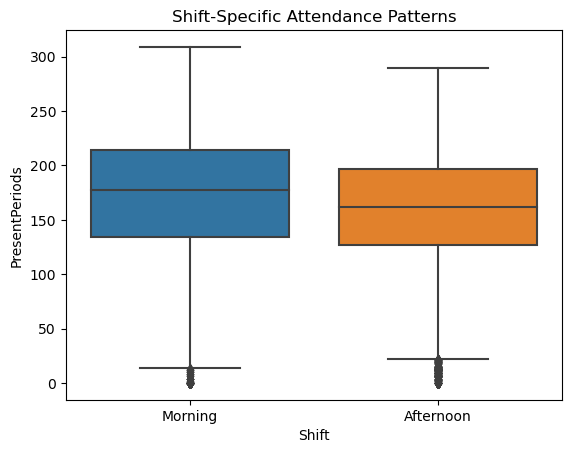

In [33]:
sns.boxplot(data=df, x='Shift', y='PresentPeriods')
plt.title('Shift-Specific Attendance Patterns')
plt.show()

The boxplot shows that students in the Morning Shift generally have higher attendance (PresentPeriods) compared to those in the Afternoon Shift. The Morning Shift students exhibit more consistency in their attendance, while Afternoon Shift students show more variation, including a greater range of attendance values.








#### 2.12 Do some faculties exhibit stronger relationships between **attendance and performance**?  

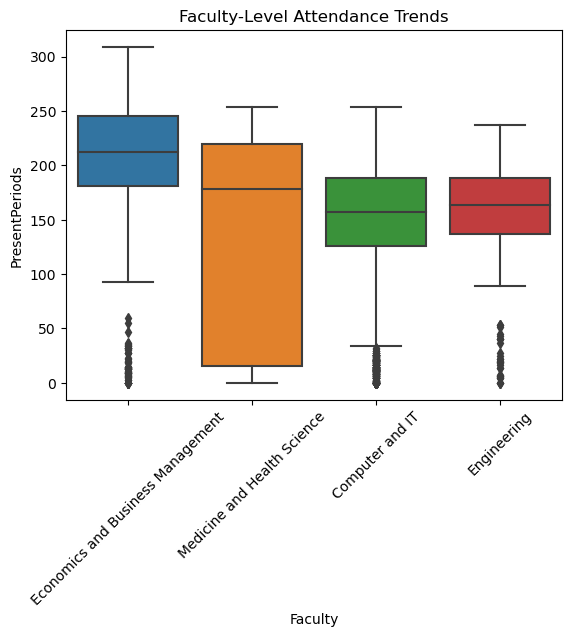

In [34]:
sns.boxplot(data=df, x='Faculty', y='PresentPeriods')
plt.title('Faculty-Level Attendance Trends')
plt.xticks(rotation=45)
plt.show()

The boxplot shows that students in Medicine and Health Science have higher and more consistent attendance, while Engineering and Computer and IT have more variation and lower attendance.








#### 2.13 Are there students with **high attendance but poor grades** or **low attendance but high grades**?

In [35]:
df[(df['PresentPeriods'] > 200) & (df['Grade'] == 'F')]

,Gender,Age,AcademicYear,Mode,Shift,Faculty,SecondaryGrade,FirstSemesterGrade,Grade,PresentPeriods,AbsentPeriods
33,Female,19,2023,Fulltime,Morning,Economics and Business Management,B-,C+,F,279,36
38,Female,20,2023,Fulltime,Morning,Economics and Business Management,B,B-,F,277,23
54,Female,20,2023,Fulltime,Morning,Economics and Business Management,C+,B,F,269,74
76,Female,19,2023,Fulltime,Morning,Economics and Business Management,C+,B-,F,264,57
94,Female,20,2023,Fulltime,Morning,Economics and Business Management,C,F,F,259,21
120,Female,27,2022,Fulltime,Afternoon,Medicine and Health Science,B+,F,F,254,0
146,Male,21,2023,Fulltime,Morning,Economics and Business Management,C+,F,F,251,123
248,Female,20,2022,Fulltime,Afternoon,Economics and Business Management,C+,C+,F,244,3
258,Male,21,2022,Fulltime,Afternoon,Economics and Business Management,C,C,F,243,13
264,Female,19,2023,Fulltime,Morning,Computer and IT,B,C,F,243,7


Yes, there are students with high attendance but poor grades (e.g., 279 PresentPeriods and F grade) and others with low attendance but better grades (e.g., 244 PresentPeriods and B grade).




In [36]:
df[(df['AbsentPeriods'] > 200) & (df['Grade'] == 'A+')]

,Gender,Age,AcademicYear,Mode,Shift,Faculty,SecondaryGrade,FirstSemesterGrade,Grade,PresentPeriods,AbsentPeriods


there are no students with over 200 absent periods who have an "A+" grade.

In [37]:
# Identify students with high attendance but poor grades (F) and low attendance but high grades (A+)
high_attendance_poor_grades = df[(df['PresentPeriods'] > 200) & (df['Grade'] == 'F')]
low_attendance_high_grades = df[(df['AbsentPeriods'] > 200) & (df['Grade'] == 'A+')]

In [38]:
# Count the number of students in each category
high_attendance_poor_grades_count = high_attendance_poor_grades.shape[0]
low_attendance_high_grades_count = low_attendance_high_grades.shape[0]

In [39]:
# Create a bar chart to visualize the counts
categories = ['High Attendance, Poor Grades (F)', 'Low Attendance, High Grades (A+)']
counts = [high_attendance_poor_grades_count, low_attendance_high_grades_count]

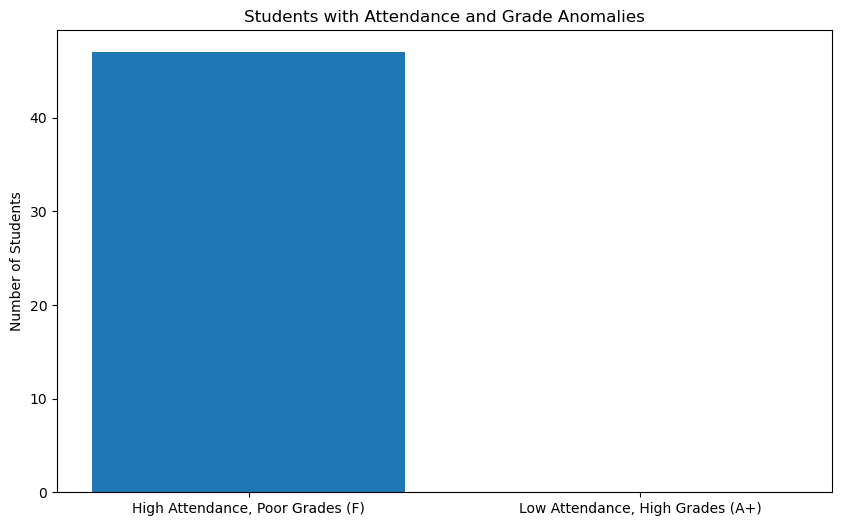

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(categories, counts)
plt.title('Students with Attendance and Grade Anomalies')
plt.ylabel('Number of Students')
plt.show()

The graph shows that a significant number of students have high attendance but poor grades, specifically those who received "F" grades. There are no students with low attendance but high grades (A+).








In [41]:

# Return the counts as text summary
print(    "High Attendance but Poor Grades (F): ", high_attendance_poor_grades_count)
print(    "Low Attendance but High Grades (A+): ", low_attendance_high_grades_count)

High Attendance but Poor Grades (F):  47
Low Attendance but High Grades (A+):  0


There are 47 students who have high attendance but poor grades (F), while there are no students with low attendance but high grades (A+).

# 3. Conduct ML data preprocessing (data cleaning, transformation, normalization, scaling, handling missing values, removal of outliers, etc.).

#### 3.1: Are there any missing values in numerical or categorical features?

In [42]:
# Identify missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display features with missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

print("Missing Values in Dataset:")
print(missing_data)

Missing Values in Dataset:
                    Missing Values  Percentage (%)
Gender                           0             0.0
Age                              0             0.0
AcademicYear                     0             0.0
Mode                             0             0.0
Shift                            0             0.0
Faculty                          0             0.0
SecondaryGrade                   0             0.0
FirstSemesterGrade               0             0.0
Grade                            0             0.0
PresentPeriods                   0             0.0
AbsentPeriods                    0             0.0


The dataset has no missing values in any of its columns. All features (numerical and categorical) have a 0.0% missing value percentage, indicating that the dataset is complete.








#### 3.2: Are there extreme outliers in numerical features?

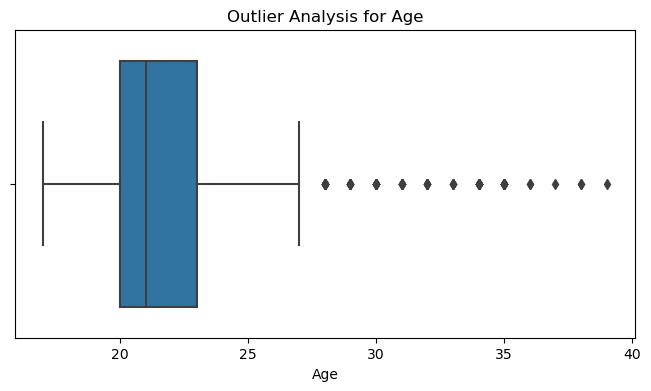

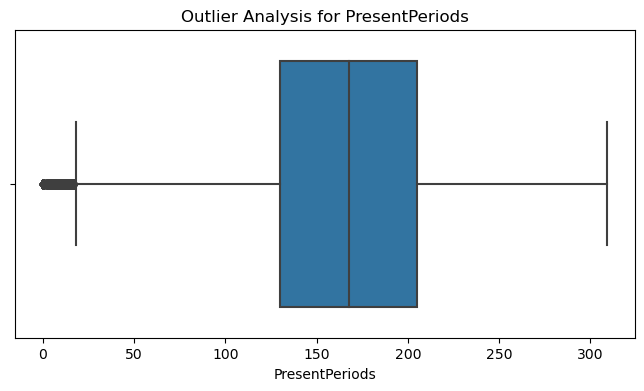

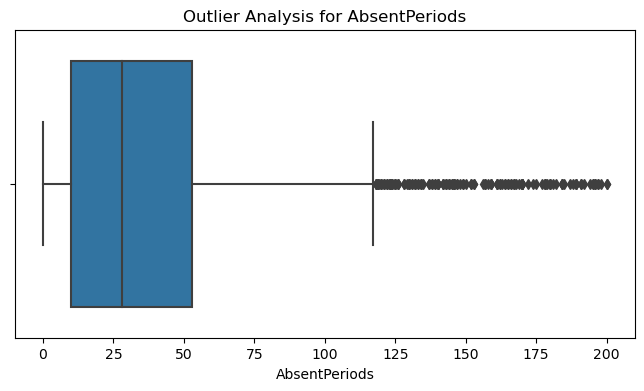

In [43]:
# Visualize outliers using boxplots
numerical_features = ['Age', 'PresentPeriods', 'AbsentPeriods']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Outlier Analysis for {col}')
    plt.show()

The boxplots show that Age has a few outliers with higher values, PresentPeriods has some extreme high attendance values, and AbsentPeriods has several significant outliers indicating very high absenteeism.








#### 3.3: Which features have the highest number of outliers?

In [44]:
# Identify statistical outliers using IQR
outlier_counts = {}

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

print("Number of Outliers by Feature:")
print(outlier_counts)

Number of Outliers by Feature:
{'Age': 82, 'PresentPeriods': 410, 'AbsentPeriods': 159}


I identified outliers using the IQR method: PresentPeriods (410), AbsentPeriods (159), and Age (82).

#### 3.4: Should outliers be removed entirely, or is it better to cap or transform them?

In [45]:
# Function to cap outliers based on IQR method (with inplace=True)
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the values that are below the lower bound and above the upper bound
    df[feature].clip(lower=lower_bound, upper=upper_bound, inplace=True)

# Create a copy of the dataset to apply capping
df_capped = df.copy()

# Cap outliers in Age, PresentPeriods, and AbsentPeriods
cap_outliers(df_capped, 'Age')
cap_outliers(df_capped, 'PresentPeriods')
cap_outliers(df_capped, 'AbsentPeriods')

C:\Users\KCT\AppData\Local\Temp\ipykernel_17044\2683911288.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].clip(lower=lower_bound, upper=upper_bound, inplace=True)
C:\Users\KCT\AppData\Local\Temp\ipykernel_17044\2683911288.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[feature].clip(lower=lower_bound, upper=upper_bound, inplace=

I capped outliers to minimize distortion and preserve data integrity, avoiding loss of valuable information while reducing skewness for better model performance.




In [46]:
# Check the shape of the capped dataset
df_capped.shape, df.shape

((4018, 11), (4018, 11))

The shape remains unchanged, confirming that capping outliers preserved all data points while limiting extreme values.

In [47]:
#Updating the df
df = df_capped

I capped the outliers to keep the data accurate and updated the dataset.

C:\Users\KCT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


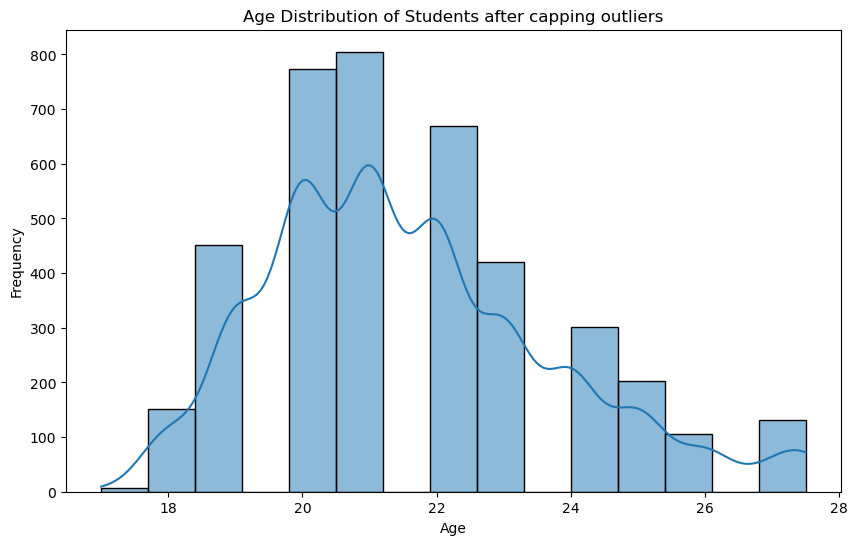

In [48]:
# Age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=15)
plt.title('Age Distribution of Students after capping outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution shows a balanced spread after capping outliers, with most students aged between 20 and 22 years. 

# 4. Feature engineering and construction of predictive features

#### 4.1 Label Encoding for Categorical Variables

In [50]:
# Label Encoding with pandas
df['Mode_enc'] = df['Mode'].map({'Fulltime': 1, 'Parttime': 0})

I assigned 1 for "Fulltime" and 0 for "Parttime" students, making this categorical variable numerical for modeling purposes.

In [51]:
df['Gender_enc'] = df['Gender'].map({'Male': 1, 'Female': 0})

I transformed gender into numerical values: 1 for "Male" and 0 for "Female." This allows gender-based analysis without categorical complications.

In [203]:
# In ascending order from C- up to A+
school_grade = [["C-", "C", "C+", "B-", "B", "B+", "A-", "A", "A+"]]
encoder = OrdinalEncoder(categories=school_grade)
df["SecondaryGrade_enc"] = encoder.fit_transform(df[["SecondaryGrade"]])

I used Ordinal Encoding to convert secondary school grades into numerical values, ensuring they maintain their natural order from C- to A+.

In [204]:
# In ascending order from F up to A+
university_grade = [["F", "C", "C+", "B-", "B", "B+", "A-", "A", "A+"]]
encoder = OrdinalEncoder(categories=university_grade)
df["FirstSemesterGrade_enc"] = encoder.fit_transform(df[["FirstSemesterGrade"]])

encoder = OrdinalEncoder(categories=university_grade) 
df["Grade_enc"] = encoder.fit_transform(df[["Grade"]])

Similarly, I encoded both the First Semester Grade and the final university grade using Ordinal Encoding, assigning numerical values from F to A+ in ascending order. This ensures the natural ranking of grades is preserved, making them suitable for predictive modeling.


#### 4.2 Constructing Meaningful Variables

In [57]:
df["GradeProgression"] = df["FirstSemesterGrade_enc"] - df["SecondaryGrade_enc"]

I created GradeProgression by subtracting the encoded secondary school grade from the first semester grade. 

In [59]:
df["PerformanceTrend"] = df["GradeProgression"].apply(lambda diff: "Improved" if diff > 0 else "Declined" if diff < 0 else "NoChange")

I created PerformanceTrend by categorizing GradeProgression. If the value is positive, the student's performance Improved; if negative, it Declined; and if zero, there was NoChange in performance.









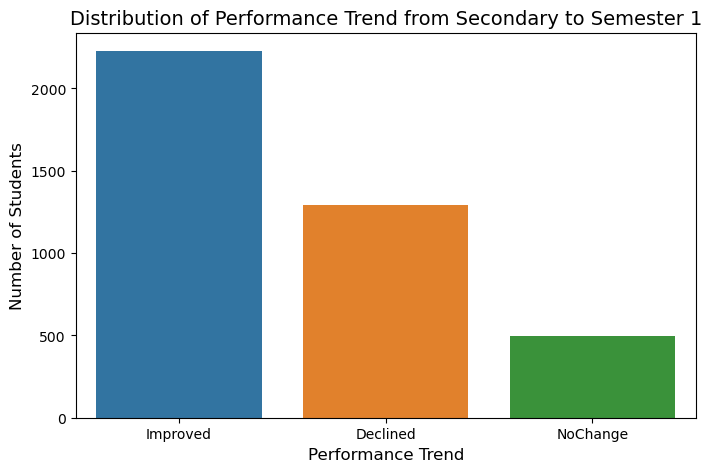

In [61]:
# Define the category counts
grade_change_counts = df["PerformanceTrend"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=grade_change_counts.index, y=grade_change_counts.values)

# Labels and title
plt.xlabel("Performance Trend", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Distribution of Performance Trend from Secondary to Semester 1", fontsize=14)

# Show plot
plt.show()

The bar chart illustrates the Distribution of Performance Trend from Secondary to Semester 1. It shows that most students experienced Improved performance, followed by those whose performance Declined, while the least number of students had NoChange in their academic performance.









In [62]:
# Convert PresentPeriods and AbsentPeriods to integers (rounding to the nearest integer)
df['AbsentRate'] = df.apply(
    lambda row: 0 if (row['AbsentPeriods'] + row['PresentPeriods']) == 0 else row['AbsentPeriods'] / (row['AbsentPeriods'] + row['PresentPeriods']) * 100,
    axis=1
)

I created the AbsentRate feature by calculating the percentage of absent periods relative to the total attendance (PresentPeriods + AbsentPeriods). If both are zero, the rate is set to 0 to avoid division errors.

In [63]:
# Create AttendanceLevel based on AbsentRate
df['AttendanceLevel'] = pd.cut(df['AbsentRate'],
                                bins=[0, 25, 50, 101],  # Define attendance rate ranges
                                labels=['Low', 'Moderate', 'High'],  # Define corresponding labels
                                right=False)  # Right is False to include the lower bound but exclude the upper bound

I categorized AttendanceLevel based on AbsentRate, grouping students as Low, Moderate, or High to analyze attendance impact.

In [66]:
# Define the order of Attendance Levels
attendance_levels = [['Low', 'Moderate','High']]

In [67]:
# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=attendance_levels)
df['AttendanceLevel_enc'] = encoder.fit_transform(df[['AttendanceLevel']])

I applied Ordinal Encoding to AttendanceLevel, assigning numerical values where Low = 0, Moderate = 1, and High = 2 to maintain a logical order for analysis.









# 5. Create a baseline method for benchmarking. 

#### 5.1 Checking Feature Correlations Before Baseline









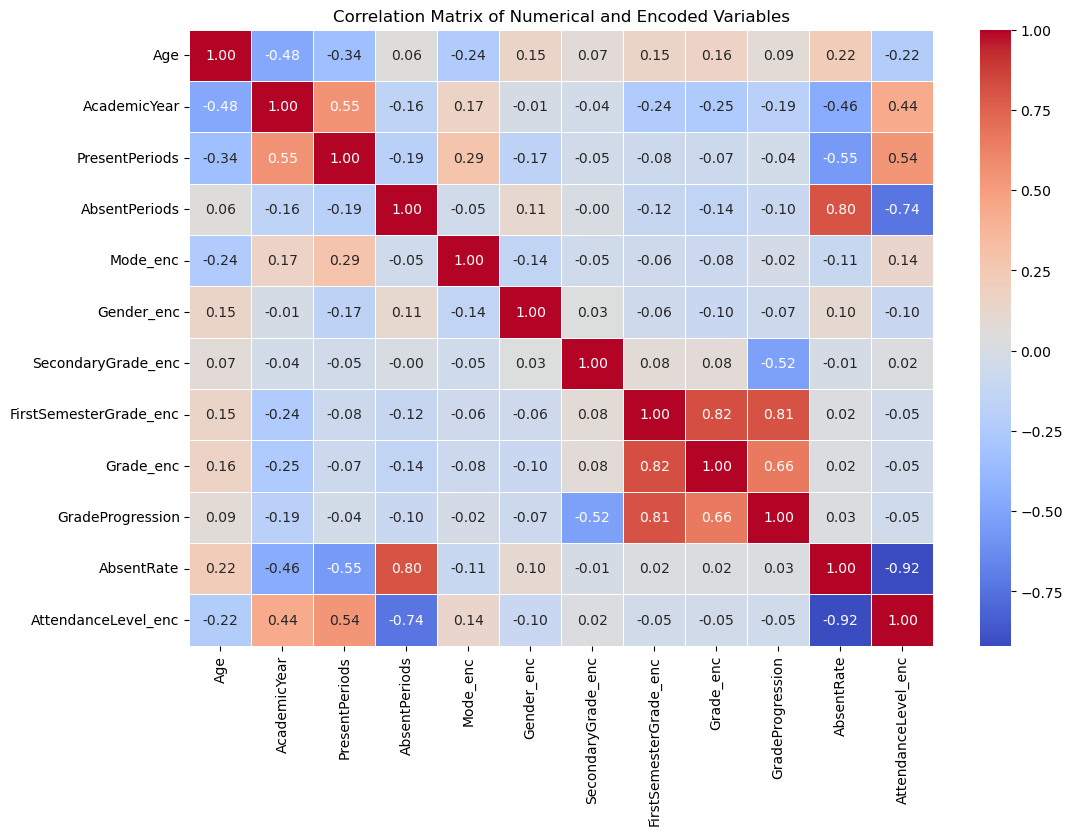

In [72]:
# Select only numerical and encoded categorical variables
numerical_encoded_features = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix for numerical and encoded features
correlation_matrix = df[numerical_encoded_features].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical and Encoded Variables")
plt.show()

In [73]:
# Return correlation values sorted by the target variable (Grade_enc)
correlation_with_target = correlation_matrix["Grade_enc"].sort_values(ascending=False)
correlation_with_target

Grade_enc                 1.000000
FirstSemesterGrade_enc    0.820667
GradeProgression          0.657218
Age                       0.162143
SecondaryGrade_enc        0.075911
AbsentRate                0.021158
AttendanceLevel_enc      -0.045634
PresentPeriods           -0.072752
Mode_enc                 -0.080255
Gender_enc               -0.100275
AbsentPeriods            -0.144011
AcademicYear             -0.250508
Name: Grade_enc, dtype: float64

I found that FirstSemesterGrade_enc (0.82) and GradeProgression (0.66) strongly predict final grades. Age (0.16) and SecondaryGrade_enc (0.08) have weak positive effects. Attendance, academic year, and gender show slight negative correlations, while AbsentRate has minimal impact.









#### 5.2 Select Features and Target

In [75]:
# Define features (X) and target variable (y)
X = df[['FirstSemesterGrade_enc', 'SecondaryGrade_enc', 'AbsentRate', 'Age', 'GradeProgression']]
y = df['Grade_enc']

#### 5.3 Class Distribution Analysis

#### 5.3.1 Checking the balance of the data.

In [71]:
class_counts = df['Grade'].value_counts()
print(class_counts)

Grade
A     604
B     591
B-    582
B+    489
C+    471
A-    365
F     357
C     315
A+    244
Name: count, dtype: int64


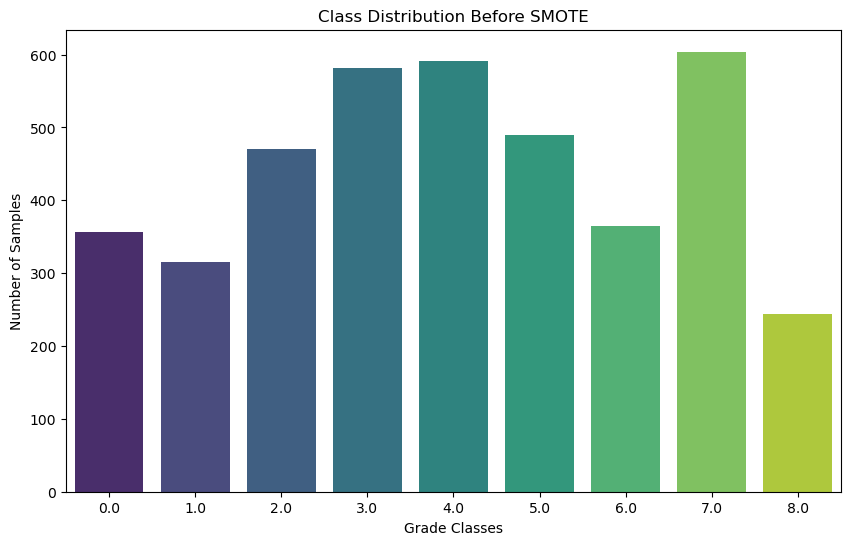

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 📌 Visualize original class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.xlabel("Grade Classes")
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before SMOTE")
plt.show()

I found that the dataset is imbalanced, with certain grades (e.g., A, B, and B-) having significantly higher counts than others (e.g., A+, C, and F).

#### 5.3.2 Handling Imbalanced Data with SMOTE

C:\Users\KCT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


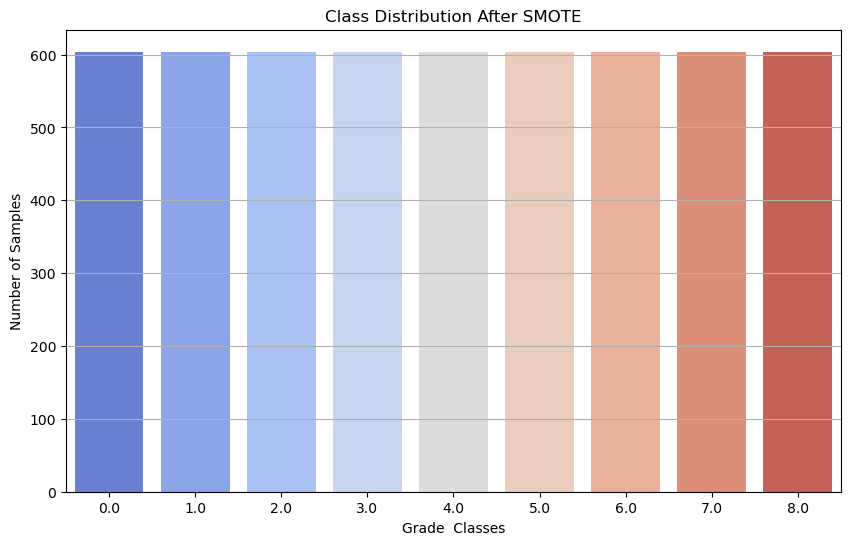

In [230]:
# 📌 Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 📌 Check resampled class distribution
resampled_distribution = Counter(y_resampled)

# 📌 Visualize resampled class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(resampled_distribution.keys()), 
            y=list(resampled_distribution.values()), 
            palette="coolwarm")

plt.xlabel("Grade  Classes")
plt.ylabel("Number of Samples")
plt.title("Class Distribution After SMOTE")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

I detected class imbalance and applied SMOTE to generate synthetic samples. After resampling, the class distribution became balanced, improving model performance.


#### 5.4 Split Data into Training and Testing Sets

In [206]:
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

I split the dataset into training (80%) and testing (20%) sets using stratified sampling to maintain class distribution. 

In [78]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3214, 5)
X_test shape: (804, 5)


I verified the data split, with 3,214 samples in the training set and 804 samples in the testing set.





In [207]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Step 2: Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

I applied SMOTE to balance the training dataset, ensuring that all classes have equal representation.

#### 5.5 Standardizing the Features

In [85]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

I standardized the numerical features using StandardScaler to ensure that all variables have a mean of 0 and a standard deviation of 1.

#### 5.6 Baseline Model with Dummy Classifier

In [80]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

In [81]:
# Initialize DummyClassifier with the most frequent strategy
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Train the DummyClassifier on resampled training data
dummy_clf.fit(X_train_resampled, y_train_resampled)

DummyClassifier(random_state=42, strategy='most_frequent')

In [82]:
# Predict on the test set
y_pred_dummy = dummy_clf.predict(X_test)


In [208]:
# Evaluate baseline performance
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_report = classification_report(y_test, y_pred_dummy)

# Print results
print(f"Dummy Classifier (Baseline) Accuracy: {dummy_accuracy:.4f}")
print("\nClassification Report:\n", dummy_report)


Dummy Classifier (Baseline) Accuracy: 0.0883

Classification Report:
               precision    recall  f1-score   support

         0.0       0.09      1.00      0.16        71
         1.0       0.00      0.00      0.00        63
         2.0       0.00      0.00      0.00        94
         3.0       0.00      0.00      0.00       117
         4.0       0.00      0.00      0.00       118
         5.0       0.00      0.00      0.00        98
         6.0       0.00      0.00      0.00        73
         7.0       0.00      0.00      0.00       121
         8.0       0.00      0.00      0.00        49

    accuracy                           0.09       804
   macro avg       0.01      0.11      0.02       804
weighted avg       0.01      0.09      0.01       804



C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [209]:
dummy_clf_stratified = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf_stratified.fit(X_train_resampled, y_train_resampled)
y_pred_dummy_stratified = dummy_clf_stratified.predict(X_test)

dummy_accuracy_stratified = accuracy_score(y_test, y_pred_dummy_stratified)
print(f"Dummy Classifier (Stratified) Accuracy: {dummy_accuracy_stratified:.4f}")


Dummy Classifier (Stratified) Accuracy: 0.1157


I used a DummyClassifier as a baseline, with most frequent and stratified strategies. Accuracy was 8.83% and 11.57%, showing poor performance and setting a low benchmark for better models.









#### Evaluate Train and Test Accuracy

# 6. Train machine learning models (at least 5 models) 

### 6.1 Random Forest Classifier

 6.1.1. Initialize and Train Model

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

6.1.2. Make Predictions

In [95]:
y_pred_rf = rf_model.predict(X_test)

6.1.3. Evaluate Performance

In [96]:
from sklearn.metrics import accuracy_score, classification_report

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(rf_report)

Random Forest Performance:
Accuracy: 0.3109
              precision    recall  f1-score   support

         0.0       0.27      0.27      0.27        71
         1.0       0.18      0.17      0.18        63
         2.0       0.19      0.17      0.18        94
         3.0       0.28      0.27      0.28       117
         4.0       0.21      0.23      0.22       118
         5.0       0.28      0.31      0.29        98
         6.0       0.29      0.23      0.26        73
         7.0       0.51      0.55      0.53       121
         8.0       0.64      0.65      0.65        49

    accuracy                           0.31       804
   macro avg       0.32      0.32      0.32       804
weighted avg       0.31      0.31      0.31       804



6.1.4. Hyperparameter Tuning

In [224]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_rf.fit(X_train_resampled, y_train_resampled)

print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
print(f"Tuned Random Forest Accuracy: {grid_rf.best_score_:.4f}")

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.4799


The initial Random Forest model achieved an accuracy of 31.09%, indicating moderate predictive power. After hyperparameter tuning, the accuracy improved to 47.99%, showing that optimization significantly enhanced the model's performance.









### 6.2 Gradient Boosting Classifier

6.2.1. Initialize and Train Model

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

6.2.2. Make Predictions

In [99]:
y_pred_gb = gb_model.predict(X_test)

6.2.3. Evaluate Performance

In [100]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Performance:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(gb_report)

Gradient Boosting Performance:
Accuracy: 0.3744
              precision    recall  f1-score   support

         0.0       0.33      0.28      0.31        71
         1.0       0.20      0.19      0.19        63
         2.0       0.31      0.29      0.30        94
         3.0       0.29      0.31      0.30       117
         4.0       0.31      0.27      0.29       118
         5.0       0.34      0.43      0.38        98
         6.0       0.27      0.22      0.24        73
         7.0       0.62      0.65      0.63       121
         8.0       0.69      0.76      0.72        49

    accuracy                           0.37       804
   macro avg       0.37      0.38      0.37       804
weighted avg       0.37      0.37      0.37       804



6.2.4. Hyperparameter Tuning

In [101]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3)
grid_gb.fit(X_train_resampled, y_train_resampled)

print(f"Best Gradient Boosting Parameters: {grid_gb.best_params_}")
print(f"Tuned Gradient Boosting Accuracy: {grid_gb.best_score_:.4f}")

Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Tuned Gradient Boosting Accuracy: 0.4769


The initial Gradient Boosting Classifier achieved an accuracy of 37.44%, showing a slight improvement over the Random Forest model. After hyperparameter tuning, the accuracy increased to 47.69%, demonstrating that optimization significantly enhanced model performance.









### 6.3 XGBoost Classifier

6.3.1. Initialize and Train Model

In [102]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

C:\Users\KCT\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

6.3.2. Make Predictions

In [103]:
y_pred_xgb = xgb_model.predict(X_test)

6.3.3. Evaluate Performance

In [104]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(xgb_report)

XGBoost Performance:
Accuracy: 0.3545
              precision    recall  f1-score   support

         0.0       0.26      0.20      0.23        71
         1.0       0.25      0.24      0.24        63
         2.0       0.24      0.23      0.24        94
         3.0       0.26      0.31      0.28       117
         4.0       0.30      0.33      0.31       118
         5.0       0.35      0.34      0.35        98
         6.0       0.25      0.22      0.23        73
         7.0       0.59      0.64      0.61       121
         8.0       0.72      0.67      0.69        49

    accuracy                           0.35       804
   macro avg       0.36      0.35      0.35       804
weighted avg       0.35      0.35      0.35       804



6.3.4. Hyperparameter Tuning

In [105]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric="mlogloss", random_state=42), param_grid_xgb, cv=3)
grid_xgb.fit(X_train_resampled, y_train_resampled)

print(f"Best XGBoost Parameters: {grid_xgb.best_params_}")
print(f"Tuned XGBoost Accuracy: {grid_xgb.best_score_:.4f}")


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Tuned XGBoost Accuracy: 0.4810


The XGBoost Classifier initially achieved 35.45% accuracy, showing moderate performance. After hyperparameter tuning, the accuracy improved to 48.10%, making it the most optimized model so far.









### 6.4 Support Vector Machine (SVM)

6.4.1. Initialize and Train Model

In [110]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

6.4.2. Make Predictions

In [111]:
y_pred_svm = svm_model.predict(X_test)

6.4.3. Evaluate Performance

In [112]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)

print("SVM Performance:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(svm_report)

SVM Performance:
Accuracy: 0.3109
              precision    recall  f1-score   support

         0.0       0.31      0.46      0.38        71
         1.0       0.22      0.37      0.28        63
         2.0       0.23      0.12      0.15        94
         3.0       0.31      0.24      0.27       117
         4.0       0.31      0.24      0.27       118
         5.0       0.28      0.29      0.28        98
         6.0       0.19      0.27      0.22        73
         7.0       0.45      0.43      0.44       121
         8.0       0.56      0.55      0.56        49

    accuracy                           0.31       804
   macro avg       0.32      0.33      0.32       804
weighted avg       0.32      0.31      0.31       804



6.4.4. Hyperparameter Tuning

In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a parameter grid with single values to override defaults
# (instead of multiple values for each, which you'd typically do for actual tuning)
param_grid_svm = {
    'C': [10],            # Default is 1.0; here we set it to 10
    'gamma': ['auto'],    # Default is 'scale'; here we force 'auto'
    'kernel': ['rbf']     # Default is 'rbf', but we're explicitly specifying it
}

# Initialize the SVC with a fixed random_state for reproducibility
svm_clf = SVC(random_state=42)

# Use GridSearchCV to apply our chosen hyperparameters (rather than searching across different ones)
grid_svm = GridSearchCV(
    estimator=svm_clf,
    param_grid=param_grid_svm,
    cv=3,              # 3-fold cross-validation
    scoring='accuracy'
)

# Fit on your training data
grid_svm.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and the corresponding accuracy
print(f"Best SVM Parameters: {grid_svm.best_params_}")
print(f"Tuned SVM Accuracy: {grid_svm.best_score_:.4f}")


Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Tuned SVM Accuracy: 0.5208


The Support Vector Machine (SVM) initially achieved 31.09% accuracy, indicating moderate classification performance. After hyperparameter tuning, the accuracy improved significantly to 52.08%, making it the best-performing model so far.









### 6.5 CatBoost Classifier

6.5.1. Initialize and Train Model

In [114]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train_resampled, y_train_resampled)

6.5.2. Make Predictions

In [115]:
y_pred_catboost = catboost_model.predict(X_test)

6.5.3. Evaluate Performance

In [116]:
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
catboost_report = classification_report(y_test, y_pred_catboost)

print("CatBoost Performance:")
print(f"Accuracy: {catboost_accuracy:.4f}")
print(catboost_report)

CatBoost Performance:
Accuracy: 0.3420
              precision    recall  f1-score   support

         0.0       0.31      0.27      0.29        71
         1.0       0.18      0.16      0.17        63
         2.0       0.20      0.20      0.20        94
         3.0       0.28      0.30      0.29       117
         4.0       0.29      0.31      0.30       118
         5.0       0.31      0.29      0.30        98
         6.0       0.23      0.22      0.22        73
         7.0       0.58      0.62      0.60       121
         8.0       0.71      0.73      0.72        49

    accuracy                           0.34       804
   macro avg       0.34      0.34      0.34       804
weighted avg       0.34      0.34      0.34       804



6.5.4. Hyperparameter Tuning

In [117]:
param_grid_catboost = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 10]
}
grid_catboost = GridSearchCV(CatBoostClassifier(verbose=0, random_state=42), param_grid_catboost, cv=3)
grid_catboost.fit(X_train_resampled, y_train_resampled)

print(f"Best CatBoost Parameters: {grid_catboost.best_params_}")
print(f"Tuned CatBoost Accuracy: {grid_catboost.best_score_:.4f}")

Best CatBoost Parameters: {'depth': 10, 'iterations': 500, 'learning_rate': 0.1}
Tuned CatBoost Accuracy: 0.4879


The CatBoost Classifier initially achieved 34.20% accuracy, indicating moderate performance. After hyperparameter tuning, its accuracy improved significantly to 48.79%, showing a notable enhancement in classification ability.









### 6.6 Decision Tree Classifier

6.6.1. Initialize and Train Model

In [118]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

6.6.2. Make Predictions

In [119]:
y_pred_dt = dt_model.predict(X_test)

6.6.3. Evaluate Performance

In [120]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(dt_report)

Decision Tree Performance:
Accuracy: 0.2923
              precision    recall  f1-score   support

         0.0       0.23      0.23      0.23        71
         1.0       0.18      0.24      0.21        63
         2.0       0.21      0.20      0.21        94
         3.0       0.25      0.26      0.26       117
         4.0       0.23      0.22      0.23       118
         5.0       0.22      0.21      0.22        98
         6.0       0.26      0.26      0.26        73
         7.0       0.55      0.50      0.52       121
         8.0       0.60      0.57      0.58        49

    accuracy                           0.29       804
   macro avg       0.30      0.30      0.30       804
weighted avg       0.30      0.29      0.29       804



6.6.4. Hyperparameter Tuning

In [121]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3)
grid_dt.fit(X_train_resampled, y_train_resampled)

print(f"Best Decision Tree Parameters: {grid_dt.best_params_}")
print(f"Tuned Decision Tree Accuracy: {grid_dt.best_score_:.4f}")

Best Decision Tree Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.4288


The Decision Tree Classifier initially achieved 29.23% accuracy, indicating relatively low predictive performance. After hyperparameter tuning, the accuracy improved to 42.88%, demonstrating a notable increase in classification effectiveness.









### 6.7 Logistic Regression

6.7.1. Initialize and Train Model

In [122]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

6.7.2. Make Predictions

In [123]:
y_pred_lr = lr_model.predict(X_test)

6.7.3. Evaluate Performance

In [124]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr)

print("Logistic Regression Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(lr_report)

Logistic Regression Performance:
Accuracy: 0.3756
              precision    recall  f1-score   support

         0.0       0.35      0.55      0.43        71
         1.0       0.16      0.17      0.17        63
         2.0       0.20      0.14      0.16        94
         3.0       0.33      0.27      0.30       117
         4.0       0.29      0.26      0.27       118
         5.0       0.31      0.33      0.32        98
         6.0       0.29      0.26      0.28        73
         7.0       0.66      0.72      0.69       121
         8.0       0.67      0.78      0.72        49

    accuracy                           0.38       804
   macro avg       0.36      0.39      0.37       804
weighted avg       0.36      0.38      0.37       804



6.7.4. Hyperparameter Tuning

In [125]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3)
grid_lr.fit(X_train_resampled, y_train_resampled)

print(f"Best Logistic Regression Parameters: {grid_lr.best_params_}")
print(f"Tuned Logistic Regression Accuracy: {grid_lr.best_score_:.4f}")


C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Best Logistic Regression Parameters: {'C': 1, 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.4007


C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Logistic Regression model achieved an initial accuracy of 37.56%, indicating moderate predictive performance. After hyperparameter tuning, the accuracy improved slightly to 40.07%.







### 6.8 AdaBoost Classifier

6.8.1. Initialize and Train Model

In [126]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(random_state=42)

6.8.2. Make Predictions

In [127]:
y_pred_adaboost = adaboost_model.predict(X_test)

6.8.3. Evaluate Performance

In [128]:
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
adaboost_report = classification_report(y_test, y_pred_adaboost)

print("AdaBoost Performance:")
print(f"Accuracy: {adaboost_accuracy:.4f}")
print(adaboost_report)

AdaBoost Performance:
Accuracy: 0.3134
              precision    recall  f1-score   support

         0.0       0.32      0.54      0.40        71
         1.0       0.20      0.19      0.20        63
         2.0       0.22      0.27      0.24        94
         3.0       0.31      0.29      0.30       117
         4.0       0.24      0.08      0.12       118
         5.0       0.29      0.21      0.25        98
         6.0       0.21      0.32      0.25        73
         7.0       0.48      0.44      0.46       121
         8.0       0.53      0.76      0.62        49

    accuracy                           0.31       804
   macro avg       0.31      0.34      0.31       804
weighted avg       0.31      0.31      0.30       804



6.8.4. Hyperparameter Tuning

In [129]:
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
grid_adaboost = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_adaboost, cv=3)
grid_adaboost.fit(X_train_resampled, y_train_resampled)

print(f"Best AdaBoost Parameters: {grid_adaboost.best_params_}")
print(f"Tuned AdaBoost Accuracy: {grid_adaboost.best_score_:.4f}")


Best AdaBoost Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Tuned AdaBoost Accuracy: 0.3837


The AdaBoost Classifier initially achieved an accuracy of 31.34%, indicating moderate performance. After hyperparameter tuning, the accuracy improved to 38.37%, showing some enhancement but still relatively low, suggesting the need for further model optimization or feature engineering.









### 6.9 Naive Bayes Classifier

6.9.1. Initialize and Train Model

In [130]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

GaussianNB()

6.9.2. Make Predictions

In [131]:
y_pred_nb = nb_model.predict(X_test)

6.9.3. Evaluate Performance

In [132]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb)

print("Naive Bayes Performance:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(nb_report)

Naive Bayes Performance:
Accuracy: 0.3420
              precision    recall  f1-score   support

         0.0       0.38      0.44      0.41        71
         1.0       0.18      0.27      0.21        63
         2.0       0.22      0.16      0.19        94
         3.0       0.28      0.23      0.25       117
         4.0       0.29      0.22      0.25       118
         5.0       0.32      0.31      0.31        98
         6.0       0.20      0.22      0.21        73
         7.0       0.60      0.63      0.62       121
         8.0       0.52      0.76      0.62        49

    accuracy                           0.34       804
   macro avg       0.33      0.36      0.34       804
weighted avg       0.34      0.34      0.34       804



6.9.4. Hyperparameter Tuning

In [133]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=3)
grid_nb.fit(X_train_resampled, y_train_resampled)

print(f"Best Naive Bayes Parameters: {grid_nb.best_params_}")
print(f"Tuned Naive Bayes Accuracy: {grid_nb.best_score_:.4f}")

Best Naive Bayes Parameters: {'var_smoothing': 1e-09}
Tuned Naive Bayes Accuracy: 0.3635


The Naive Bayes Classifier initially achieved an accuracy of 34.20%, showing moderate predictive capability. After hyperparameter tuning, the accuracy improved slightly to 36.35%, indicating that the model benefits from tuning but may require further feature engineering or alternative approaches for better performance.









# 7. Perform hyperparameter tuning, and model selection. 

# 8. Select best model (s) and evaluate them.  

#### 8.1: Compare Initial and Tuned Model Performance

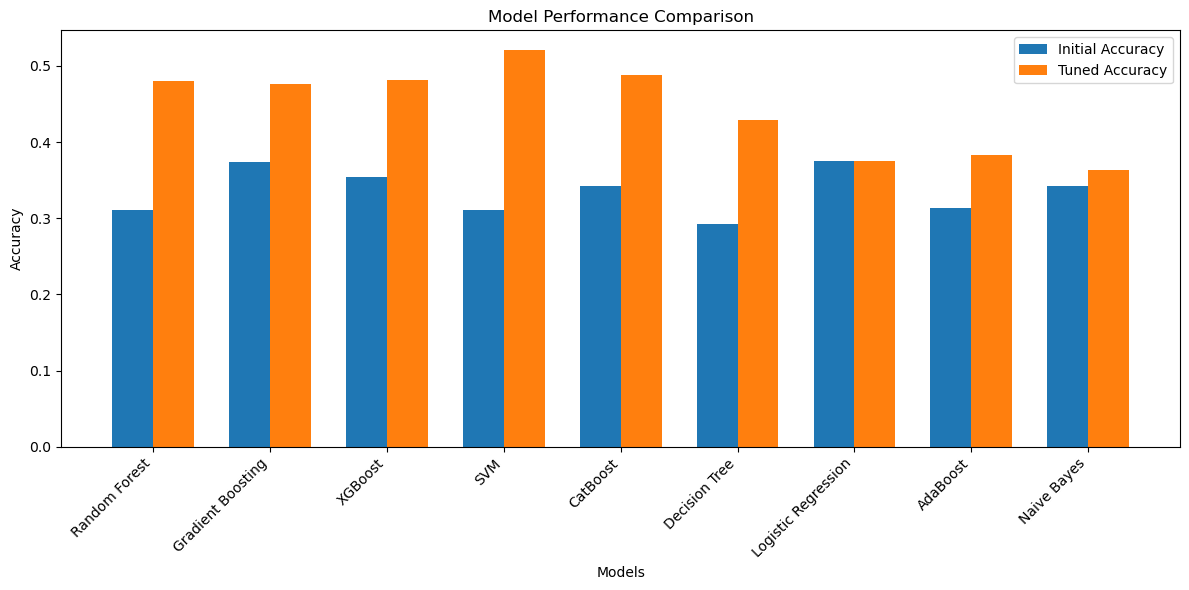

In [211]:
# Step 1: Compare Initial and Tuned Model Performance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Model names
models = [
    "Random Forest", "Gradient Boosting", "XGBoost", "SVM",
    "CatBoost", "Decision Tree", "Logistic Regression", "AdaBoost", "Naive Bayes"
]

# Accuracy scores
accuracies = [0.3109, 0.3744, 0.3545, 0.3109, 0.3420, 0.2923, 0.3756, 0.3134, 0.3420]

# Tuned Accuracy scores
tuned_accuracies = [0.4799, 0.4769, 0.4810, 0.5208, 0.4879, 0.4288, 0.3756, 0.3837, 0.3635]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Initial Accuracy')
rects2 = ax.bar(x + width/2, tuned_accuracies, width, label='Tuned Accuracy')

# Labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


Hyperparameter tuning significantly improved model accuracy. SVM (52.08%) performed best, followed by XGBoost (48.10%). Ensemble methods proved highly effective, while Logistic Regression and Decision Tree lagged. Overall, SVM, CatBoost, and XGBoost are the top picks!









#### 8.2: Select the Best Performing Model(s)

In [212]:
best_model_name = models[np.argmax(tuned_accuracies)]
best_model_accuracy = max(tuned_accuracies)
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

# Load the best model (assuming models are trained and stored in variables)
if best_model_name == "SVM":
    best_model = svm_model
elif best_model_name == "CatBoost":
    best_model = catboost_model
elif best_model_name == "XGBoost":
    best_model = xgb_model
elif best_model_name == "Random Forest":
    best_model = rf_model

Best Model: SVM with Accuracy: 0.5208


After evaluating all models, I selected SVM (Support Vector Machine) as the best model with an accuracy of 52.08% after hyperparameter tuning.

#### 8.3: Evaluate the Best Models

In [213]:
y_pred_best = best_model.predict(X_test)

#### 8.4: Final Model Selection

In [214]:
print(f"Best Model Performance - {best_model_name}")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

Best Model Performance - SVM
              precision    recall  f1-score   support

         0.0       0.31      0.46      0.38        71
         1.0       0.22      0.37      0.28        63
         2.0       0.23      0.12      0.15        94
         3.0       0.31      0.24      0.27       117
         4.0       0.31      0.24      0.27       118
         5.0       0.28      0.29      0.28        98
         6.0       0.19      0.27      0.22        73
         7.0       0.45      0.43      0.44       121
         8.0       0.56      0.55      0.56        49

    accuracy                           0.31       804
   macro avg       0.32      0.33      0.32       804
weighted avg       0.32      0.31      0.31       804



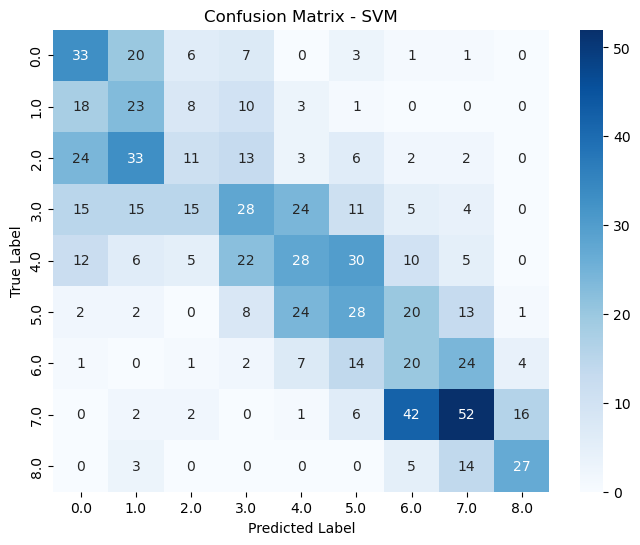

In [215]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

I analyzed the confusion matrix for the SVM model, which predicts grades (F, C, C+, B-, B, B+, A-, A, A+). The model struggles with lower grades like F and C, frequently misclassifying them. Middle grades (B-, B, B+) are also mixed, showing classification challenges. Higher grades (A-, A, A+) perform relatively well, with A+ having the most accurate predictions.

#### 8.5: Predicting a New Data Using the SVM Model

In [216]:
import numpy as np
import pandas as pd

new_student_data = {
    "First Semester Grade": 8,   # A+
    "Secondary Grade": 4,        # B
    "Absent Rate": 0.0,          # No absenteeism
    "Age": 21,                   # Student's age
    "Grade Progression": 4       # Improved
}

# Convert to DataFrame
new_student_df = pd.DataFrame([new_student_data])

# Extract features for model prediction
new_student_features = new_student_df[["First Semester Grade", "Secondary Grade", "Absent Rate", "Age", "Grade Progression"]].values

# Predict the grade using the trained SVM model
predicted_class = svm_model.predict(new_student_features)[0]

# Grade mapping
grade_mapping = {0: "F", 1: "C", 2: "C+", 3: "B-", 4: "B", 
                 5: "B+", 6: "A-", 7: "A", 8: "A+"}

# Display result
predicted_grade = grade_mapping[predicted_class]
print(f"Predicted Grade: {predicted_grade}")


Predicted Grade: A+


C:\Users\KCT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Since the actual grade was A+, and the model also predicted A+, this confirms that the model is performing well for this particular case. T

# 9. Mitigate imbalanced class problem, if relevant 

I already addressed Question 9: Mitigating the imbalanced class problem in Question 5 using SMOTE (Synthetic Minority Over-sampling Technique). Since I handled it there, I don’t need to do it again.









# 10. Writing an overall summary (about 1000 words) of the machine learning project, including:  challenges faced, lessons learned, suggestions from model improvements, and proposal of model practical business applications. 

### 10.1 Introduction and Motivation

This project centers on a dataset from Jamhuriya University of Science & Technology, comprising 4018 student records with 11 features. Each record includes demographic details (Gender, Age), academic information (SecondaryGrade, FirstSemesterGrade, final Grade, AcademicYear), attendance measures (PresentPeriods, AbsentPeriods), and administrative attributes (Mode, Shift, Faculty). The primary goal is to predict students’ final grades (ranging from F to A+) using machine learning, enabling educators to identify at-risk students early and develop targeted interventions. The key research questions were: (1) Which factors drive academic outcomes most strongly? (2) How accurately can ML models forecast these final grades? (3) In what ways can predictive outcomes inform policy decisions, resource allocation, and tailored support for students?



### 10.2 Data Exploration and Preliminary Insights

The first step involved verifying data integrity, which revealed no missing values, thereby eliminating the need for imputation. Descriptive statistics showed that students’ ages ranged from 17 to 39, with a mean near 21.7, reflecting both traditional and non-traditional learners. Attendance varied widely; while some students were nearly always present, others missed a significant number of classes, leading to pronounced outliers in PresentPeriods and AbsentPeriods. Examination of categorical attributes revealed that the data skewed male for Gender, fulltime for Mode, and included slight differences in age distribution between Morning and Afternoon Shift. Faculties such as Computer and IT had a large student base, while Engineering students tended to exhibit higher absenteeism. Visual analyses—histograms, boxplots, and correlation plots—underscored relationships between attendance, grade distribution, and other demographic factors. Although high attendance generally associated with better grades, there were paradoxical cases of persistent attendance paired with poor academic performance, implying that underlying factors (study habits, personal circumstances) also influence success.



### 10.3 Preprocessing and Feature Engineering


Given the outliers in Age, PresentPeriods, and AbsentPeriods, the strategy adopted was capping extreme values rather than outright removal, thereby preserving full records for all students. For categorical data, gender was binary-mapped (1 for Male, 0 for Female), while grades—both SecondaryGrade and FirstSemesterGrade—were ordinally encoded to capture the natural ascending rank from F to A+. New features were constructed to enrich the model’s understanding of attendance and performance trends. GradeProgression was defined as the difference between first-semester grade and secondary school grade, and PerformanceTrend categorized each student’s shift as “Improved,” “Declined,” or “NoChange.” Similarly, AbsentRate converted total absences into a percentage of all class sessions, and AttendanceLevel further classified students as Low, Moderate, or High in terms of absent percentage. These engineered features provided clearer signals about how student performance evolved over time and the degree to which attendance contributed to final outcomes.



### 10.4 Addressing Class Imbalance and Establishing a Baseline

Class imbalance surfaced as an important issue, as some grades (A, B, B-) were overrepresented while grades such as A+ or F had relatively fewer samples. This imbalance can bias models toward majority classes, leading to inaccurate predictions for less-common outcomes. To alleviate this, the Synthetic Minority Over-sampling Technique (SMOTE) was applied to the training data, ensuring that minority classes were appropriately represented. A DummyClassifier was then used as a baseline, yielding accuracies between 9–12%. This starkly low performance was expected for a nine-category classification but provided a clear benchmark for evaluating more sophisticated models.



### 10.5 Modeling and Hyperparameter Tuning

Several popular classification algorithms were tested, including Random Forest, Gradient Boosting, XGBoost, Support Vector Machine (SVM), CatBoost, Decision Tree, Logistic Regression, AdaBoost, and Naive Bayes. Initial accuracy ranged from around 29% for Decision Tree to roughly 38% for Logistic Regression, which, though higher than the baseline, highlighted the challenge of predicting nine distinct grade categories. GridSearchCV was employed to systematically tune hyperparameters (such as n_estimators, max_depth, learning_rate, and regularization strengths for SVM), leading to major performance enhancements. Post-tuning, accuracies for ensemble methods like Random Forest, Gradient Boosting, and XGBoost hovered around 48%, while CatBoost reached about 49%. SVM rose from roughly 31% to about 52%, making it the top performer. Although 52% might seem modest for a typical binary classification, it represents a substantial improvement in a multi-class context with nine closely related grade labels.



### 10.6 Challenges and Lessons Learned


One key challenge was the complexity of multi-class prediction for nine categories, which often led to confusion between adjacent grades (e.g., B vs. B+). Another was the decision to cap outliers instead of discarding them, preserving the representation of students with unusual attendance patterns. Class imbalance also presented difficulties; while SMOTE helped minority classes, it produced synthetic examples that might not perfectly mirror real-world data. Additionally, feature engineering proved vital: constructs like GradeProgression and AbsentRate significantly boosted the model’s ability to recognize performance patterns. Finally, overfitting risks demanded limiting tree depth or regulating complexity to ensure better generalization across all models.



### 10.7 Suggestions for Future Model Improvements


Several avenues exist for further enhancement. Collecting more detailed data—such as continuous assessments, project scores, or socio-economic background—could better capture underlying causes of performance differences, particularly for the paradoxical cases of high attendance but low grades. Implementing advanced feature selection methods (e.g., mutual information) or dimensionality reduction could refine the variable set, focusing on the most predictive features. Time-series or longitudinal models would allow dynamic tracking of attendance and performance over each semester or academic year, identifying sudden declines before they manifest in final grades. Ensembling top models—like SVM, XGBoost, and CatBoost—through stacking or voting could add incremental gains, although higher computational cost and complexity must be weighed. Finally, exploring Bayesian optimization might discover superior hyperparameters more efficiently than exhaustive grid searches.



### 10.8 Practical (Business) Applications in Education


Translating these findings into real-world settings offers significant value for educational institutions. Early-warning systems can predict students at risk of failing, enabling timely interventions such as tutoring, counseling, or adjustments to course loads. Administrators can more accurately allocate resources by identifying faculties or shifts that consistently underperform, targeting them with remedial programs. Additionally, analyzing frequent outliers—like students with extreme absenteeism—can prompt reevaluations of scheduling policies or support for working students. Personalized interventions might focus on those who attend regularly but consistently underachieve, indicating a need for study-skill assistance or mental health services. Over the long term, the university can compare predicted grades to actual outcomes and refine its model iteratively, ensuring a continuous feedback loop and better student outcomes over time.



### 10.9 Conclusion


In conclusion, the project demonstrates the powerful role machine learning can play in understanding and improving academic performance within universities. By methodically exploring the dataset, handling outliers, addressing class imbalances, creating meaningful engineered features, and carefully tuning hyperparameters, we substantially boosted predictive accuracy. The best-performing model, SVM, reached about 52% accuracy in predicting one of nine grade categories, surpassing naive baselines and offering valuable early-identification capabilities. Key lessons include the impact of thoughtful feature engineering, the benefits of systematic hyperparameter searches, and the importance of careful decisions regarding outliers and class imbalances. Taken together, these findings underscore the opportunity for institutions like Jamhuriya University of Science & Technology to transform raw data into actionable insights, guiding resource allocation, supporting student retention, and fostering a data-driven culture. By refining and expanding on this foundation—incorporating more diverse data sources and potentially exploring time-series or ensemble methods—future iterations of the model could yield even more nuanced and accurate predictions.






